In [6]:
import requests

# --- API Call Parameters ---
API_KEY = "" # enter your Semrush key
DOMAIN = "semrush.com"
DATABASE = "us"
LIMIT = 5 # display_limit

# Construct the API request URL
url = (
    f"https://api.semrush.com/?"
    f"type=domain_organic" # we can change the type later to other calls
    f"&key={API_KEY}"
    f"&display_limit={LIMIT}"
    f"&export_columns=Ph,Po,Pp,Pd,Nq,Cp,Ur,Tr,Tc,Co,Cn,Dt"
    f"&domain={DOMAIN}"
    f"&database={DATABASE}"
)

# Make the request
response = requests.get(url)
print(f"Fetching top {LIMIT} organic keywords for {DOMAIN} from the {DATABASE} database.")

# Check if the request was successful
if response.status_code == 200:
    api_data = response.text # response.text is the data
    print("✅ API call successful! Data received.")
    # print(api_data) I have commented out this part because the API data is returned raw 
else:
    print(f"❌ Error: {response.text}")
    api_data = None

Fetching top 5 organic keywords for semrush.com from the us database.
✅ API call successful! Data received.


In [4]:
import pandas as pd
import io

if api_data:
    # Use io.StringIO to read the text string as if it were a file
    # The separator is a semicolon ';'
    df = pd.read_csv(io.StringIO(api_data), sep=';')
    
    # Display the first few rows of the DataFrame
    print("\nHere's your Semrush data in a DataFrame:")
    print(df.head())
else:
    print("No data to process.")


Here's your Semrush data in a DataFrame:
      Keyword  Position  Previous Position  Position Difference  \
0     semrush         1                  1                    0   
1     fapello         4                  3                   -1   
2  streameast        18                 16                   -2   
3       xpaja         4                  6                    2   
4      anonib         3                  3                    0   

   Search Volume   CPC                                                Url  \
0         110000  5.73                           https://www.semrush.com/   
1        1000000  0.00  https://www.semrush.com/analytics/overview/?q=...   
2       20400000  3.30  https://www.semrush.com/website/streameast.to/...   
3         550000  0.00  https://www.semrush.com/website/xpaja.net/over...   
4         246000  0.00  https://www.semrush.com/website/anonib.to/comp...   

   Traffic (%)  Traffic Cost (%)  Competition  
0         4.02             10.23         0.2


✨ Generating plot...


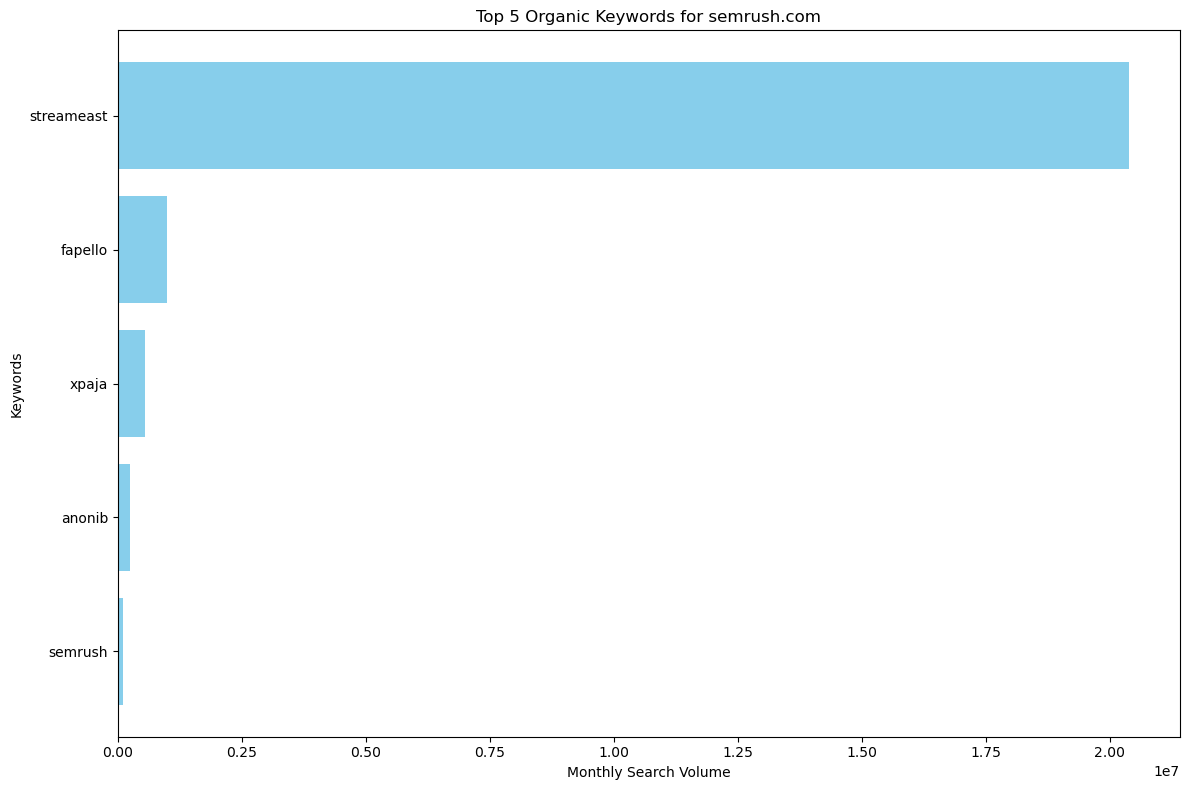

In [12]:
# --- Plot the Data with Matplotlib ---
import matplotlib.pyplot as plt

if not df.empty:
        print("\n✨ Generating plot...")
        
        # Ensure the Search Volume column is numeric for sorting
        df['Search Volume'] = pd.to_numeric(df['Search Volume'])
        
        # Sort the dataframe by Search Volume for a cleaner plot
        df = df.sort_values(by='Search Volume', ascending=True)

        # Create the plot
        plt.figure(figsize=(12, 8)) # Set the figure size for better readability
        
        # Create a horizontal bar chart
        plt.barh(df['Keyword'], df['Search Volume'], color='skyblue')
        
        # Add labels and a title
        plt.xlabel('Monthly Search Volume')
        plt.ylabel('Keywords')
        plt.title(f'Top {LIMIT} Organic Keywords for {DOMAIN}')
        
        plt.tight_layout() # Adjust layout to make sure everything fits
        plt.show() # Display the plot